**LAB-02: Exploratory Data Analysis Using Non-Parametric Methods**

---



* Created Date: 21.02.2024
* Created By: Blessy Louis(2348416)
* edited on: 21.02.2024

**Importing necessary packages for Analysis**:


1.   Pandas: Is a Python library used for working with data sets. It has functions for analyzing, cleaning, exploring, and manipulating data.
2.   Numpy:NumPy enhances Python's mathematical operations on arrays and matrices by providing a powerful data structure, a vast library of high-level functions, and efficient calculations.
3. matplotlib.pyplot: Matplotlib is an amazing visualization library in Python for 2D plots of arrays. Matplotlib is a multi-platform data visualization library built on NumPy arrays.Matplotlib consists of several plots like line, bar, scatter, histogram, etc.
4. Stats: Scipy is a powerful library in Python that provides many useful functions for scientific computing. One of its sub-modules, scipy. stats, contains a variety of statistical functions and probability distributions that are commonly used in data analysis.
5. seaborn:Python Seaborn library is a widely popular data visualization library that is commonly used for data science and machine learning tasks. You build it on top of the matplotlib data visualization library and can perform exploratory analysis.






In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns


**Load Dataset:**

The dataset used for this Analysis is A timeseries fact table of purchases over time from different  company. The data includes , features like:



*  date: date of purchase
*  company_id: The Id corresponding to each  company
*  product_category: The category to which the product purchased belong to.
*  quantity: number of units or quantity purchased
*  revenue: the amount costed for the purchase.



In [52]:
df=pd.read_csv('purchases.csv')
df

date  company_id          productcategory  quantity  \
0      2020-11-01 13:16:29           4                   Gaming        58   
1      2021-06-16 21:03:11          10                 Cookware        55   
2      2021-01-20 08:54:45           5               Home Decor        17   
3      2020-08-19 20:57:17           8                Computers        32   
4      2020-07-06 23:55:17           4         Home Improvement        76   
...                    ...         ...                      ...       ...   
99995  2020-02-13 07:30:32           7         Home Improvement        38   
99996  2021-02-21 05:21:44           2                Computers        14   
99997  2020-12-07 22:14:37           4                  Cameras        95   
99998  2020-11-27 13:19:06           3                    Audio        68   
99999  2020-09-10 16:51:11           2  Security & Surveillance        84   

       revenue  
0      2681.31  
1      1032.50  
2      1226.12  
3      1743.84  
4       851.12  
...        ...  
99995  1143.37  
99996  1445.05  
99997  1573.32  
99998  1498.69  
99999  1458.06  

[100000 rows x 5 columns]

Displaying first 5 rows of the dataset

In [53]:
df.head()

date  company_id   productcategory  quantity  revenue
0  2020-11-01 13:16:29           4            Gaming        58  2681.31
1  2021-06-16 21:03:11          10          Cookware        55  1032.50
2  2021-01-20 08:54:45           5        Home Decor        17  1226.12
3  2020-08-19 20:57:17           8         Computers        32  1743.84
4  2020-07-06 23:55:17           4  Home Improvement        76   851.12

Displaying the number of rows and columns of the dataset

In [54]:
df.shape

(100000, 5)

The dataset contains 100000 rows and 5 features/cloumns


---



**Data Description:** Features in the data

In [55]:
df.columns

Index(['date', 'company_id', 'productcategory', 'quantity', 'revenue'], dtype='object')

Checking for null values

In [56]:
df.isnull().sum()

date               0
company_id         0
productcategory    0
quantity           0
revenue            0
dtype: int64

clearly , we observe that there is no null values in the  feature date ,  but all the other feature have 1 null value ,since the count of the number of null values  for each feature is one.

let us remove the null values

In [57]:
df.dropna(inplace=True)

# Display the number of null values after removal
print("\nNull values after removal:")
print(df.isnull().sum())


Null values after removal:
date               0
company_id         0
productcategory    0
quantity           0
revenue            0
dtype: int64


clearly , we observe that  all the null values in the dataset are removed , since the count of the number of null values  for each feature is zero.

Displaying the information about the data

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   date             100000 non-null  object 
 1   company_id       100000 non-null  int64  
 2   productcategory  100000 non-null  object 
 3   quantity         100000 non-null  int64  
 4   revenue          100000 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 3.8+ MB


The above output  gives us the information about the number of enteries in the  dataset i,e. there are a total of 67456 ranging from 0-67455, the dataset includes a total of 5 columns /features

we also have the information about each feature , we can see the number of enteries(i,e. 67456) , its a non null and the datatype .
we can see that the datatypes available in the dataset are: float64 and objects
and the memory used is 3.1mb

## **Univariate Analysis**


Numerical Variables:

**Understanding some  basic descriptive statistics of the dataset**

In [59]:
df.describe()

company_id       quantity        revenue
count  100000.000000  100000.000000  100000.000000
mean        5.501570      49.501700    1500.239419
std         2.866008      19.799915     499.024313
min         1.000000       1.000000     100.000000
25%         3.000000      36.000000    1162.720000
50%         5.000000      49.000000    1498.355000
75%         8.000000      63.000000    1836.887500
max        10.000000     139.000000    3512.590000

The output  provides information about  each feature's count, minimum, maximum,mean standard deviation, and the different quartile values

In [60]:
df.groupby('productcategory')['revenue'].describe()

count         mean         std    min        25%  \
productcategory                                                              
Appliances               3924.0  1507.597263  492.634196  100.0  1169.0250   
Audio                    4094.0  1500.323156  492.419230  100.0  1167.4875   
Automotive               4001.0  1495.511872  504.762436  100.0  1154.0800   
Books & E-readers        3976.0  1488.336922  503.621209  100.0  1142.5425   
Cameras                  3953.0  1512.881826  504.377415  100.0  1167.4800   
Clothing                 4064.0  1495.199245  506.797050  100.0  1138.1625   
Computers                4066.0  1498.289009  500.747531  100.0  1160.6625   
Cookware                 4008.0  1496.465489  499.728515  100.0  1166.3900   
Electronics              4010.0  1496.850007  496.990478  100.0  1162.9425   
Fitness & Health         3912.0  1506.623272  499.628385  100.0  1179.6750   
Footwear                 3994.0  1500.279860  500.075356  100.0  1164.1775   
Gaming                   3982.0  1507.462695  495.210423  100.0  1160.9400   
Home & Kitchen           4111.0  1518.582583  507.946543  100.0  1173.2950   
Home Decor               3961.0  1487.577087  490.638624  100.0  1150.6200   
Home Improvement         4051.0  1495.632592  491.944297  100.0  1159.0150   
Mobile Devices           3960.0  1509.740427  496.464684  100.0  1177.2500   
Office Supplies          3999.0  1513.257919  493.315586  100.0  1188.0150   
Outdoor                  3959.0  1498.760124  507.592686  100.0  1156.4000   
Pet Supplies             3983.0  1501.314241  498.741434  100.0  1170.6250   
Security & Surveillance  4065.0  1493.577146  498.710338  100.0  1165.3000   
Smart Accessories        3974.0  1496.505780  496.095071  100.0  1156.1475   
Smart Home               4069.0  1490.789892  503.722718  100.0  1154.6300   
Sports & Outdoors        3951.0  1502.781757  484.292288  100.0  1172.4750   
Toys & Games             3980.0  1487.876435  499.831125  100.0  1153.5300   
Wearable Tech            3953.0  1504.062057  507.914640  100.0  1160.1800   

                              50%        75%      max  
productcategory                                        
Appliances               1510.090  1833.4225  3148.27  
Audio                    1501.745  1837.7550  3233.78  
Automotive               1496.010  1834.8800  3388.71  
Books & E-readers        1488.605  1834.6500  3231.57  
Cameras                  1512.490  1841.6900  3415.39  
Clothing                 1502.605  1835.3675  3334.99  
Computers                1495.850  1847.4925  3204.16  
Cookware                 1489.060  1830.1700  3209.13  
Electronics              1498.375  1825.3300  3154.91  
Fitness & Health         1502.935  1859.0850  3223.34  
Footwear                 1494.855  1832.0425  3372.39  
Gaming                   1512.225  1849.3075  3278.34  
Home & Kitchen           1516.120  1860.4250  3512.59  
Home Decor               1485.420  1817.8600  3224.30  
Home Improvement         1494.860  1827.0950  3243.70  
Mobile Devices           1509.590  1852.3525  3219.26  
Office Supplies          1510.570  1850.1950  3442.72  
Outdoor                  1492.350  1836.1550  3439.84  
Pet Supplies             1495.720  1828.9450  3337.59  
Security & Surveillance  1494.220  1833.3000  3444.07  
Smart Accessories        1486.860  1828.1825  3242.23  
Smart Home               1483.890  1833.9400  3189.20  
Sports & Outdoors        1507.180  1834.4350  3295.10  
Toys & Games             1487.625  1824.8400  3188.01  
Wearable Tech            1502.960  1837.9500  3199.49

This code utilizes the groupby() function in pandas to group the data in a DataFrame (df) by the values in the 'productcategory' column. After grouping, it selects the 'revenue' column and computes descriptive statistics for each group.

**Visualize distribution using histograms**

The histogram shows a skewed distribution with higher quantities, indicating a common clustering point. The width of the histogram indicates data spread, while outliers are extreme values far from the majority. The choice of bins, such as 20 bins, can influence the distribution's appearance. Overall, the histogram provides a visual representation of the dataset's quantity values, providing insights into their typical range and shape.

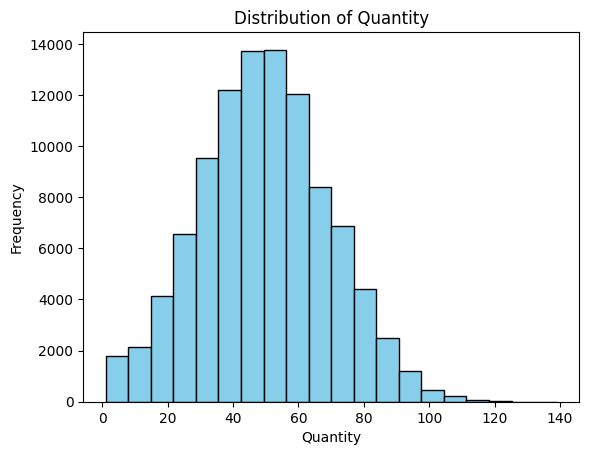

In [61]:
plt.hist(df['quantity'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Quantity')
plt.ylabel('Frequency')
plt.title('Distribution of Quantity')
plt.show()

From the above , graph we understand , distribution is almost symmetrical , but slightly right skewed , the maximum number of points are clustered for the  quantity between 40-60

In [62]:
mean = np.mean(df['quantity'])
std_dev = np.std(df['quantity'])
skewness = np.mean((df['quantity'] - mean) ** 3) / (std_dev ** 3)
kurtosis = np.mean((df['quantity'] - mean) ** 4) / (std_dev ** 4) - 3


print(f"Skewness: {skewness:.2f}")
print(f"Kurtosis: {kurtosis:.2f}")

Skewness: 0.05
Kurtosis: -0.14


In this case, a skewness value of 0.05 suggests a very slight skewness to the right, but the distribution is almost symmetrical.

In this case, a kurtosis value of -0.14 suggests a slightly negative kurtosis, indicating that the distribution is slightly flatter than a normal distribution

Box plot & Kernel density plot

The box plot displays the distribution, central tendency, spread, and presence of outliers in the quantity data. It indicates the median of the data, the spread of the middle 50%, and the presence of extreme values beyond the whiskers. The asymmetry of the distribution can be inferred from the length of the whiskers. The presence of extreme values can provide insights into the data's variability.

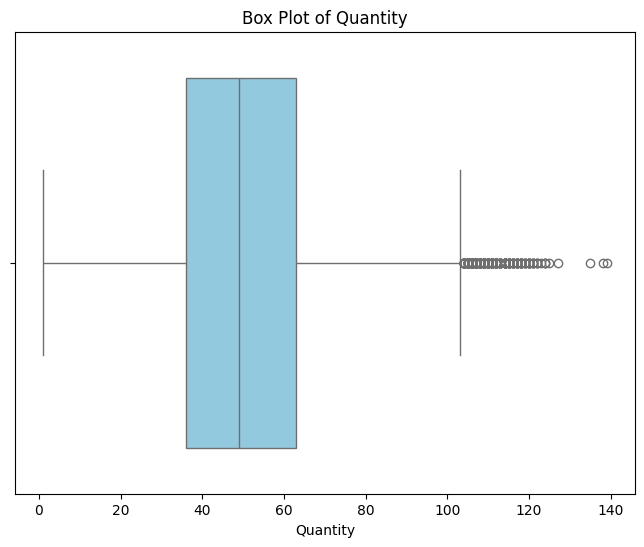

In [63]:

plt.figure(figsize=(8, 6))
sns.boxplot(x=df['quantity'], color='skyblue')
plt.xlabel('Quantity')
plt.title('Box Plot of Quantity')
plt.show()


 from the above  boxplot , we understand that the data is right skewed , and has outliers beyond the maximum value .

The kernel density plot of revenue provides a smooth estimate of the probability density function of revenue values, revealing the distribution of the data. Peaks indicate densely concentrated regions, while the width of the curve indicates data variability. The symmetry of the distribution can be inferred from the shape, and the height of the curve at any point represents the relative density of the data points.

<ipython-input-64-ff89d49856f8>:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['revenue'], color='black', shade=True)


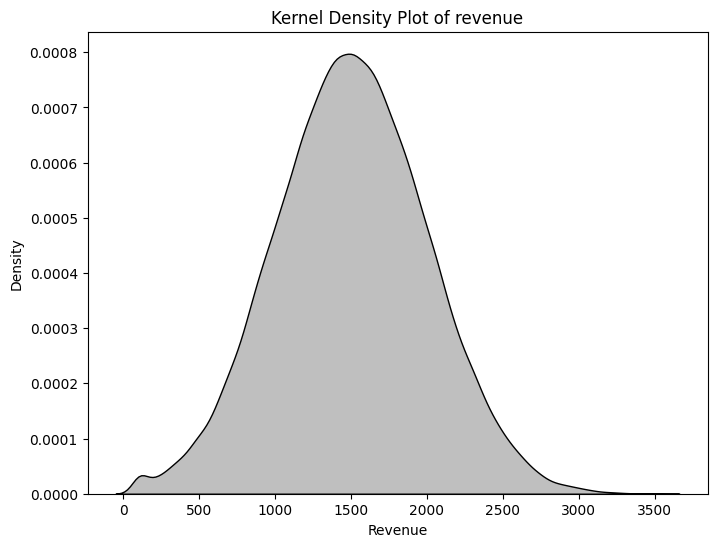

In [64]:
plt.figure(figsize=(8, 6))
sns.kdeplot(df['revenue'], color='black', shade=True)
plt.xlabel('Revenue')
plt.ylabel('Density')
plt.title('Kernel Density Plot of revenue')
plt.show()

From the above Kernel - density plot , we observe that the distribution of the revenue , is symmetric , and leptokurtic in nature, and most of the data values are clustere around 1500

Categorical Variables:
* Display frequency tables:

In [65]:
product_category_freq = df['productcategory'].value_counts(normalize=True)
print(product_category_freq)

Home & Kitchen             0.04111
Audio                      0.04094
Smart Home                 0.04069
Computers                  0.04066
Security & Surveillance    0.04065
Clothing                   0.04064
Home Improvement           0.04051
Electronics                0.04010
Cookware                   0.04008
Automotive                 0.04001
Office Supplies            0.03999
Footwear                   0.03994
Pet Supplies               0.03983
Gaming                     0.03982
Toys & Games               0.03980
Books & E-readers          0.03976
Smart Accessories          0.03974
Home Decor                 0.03961
Mobile Devices             0.03960
Outdoor                    0.03959
Cameras                    0.03953
Wearable Tech              0.03953
Sports & Outdoors          0.03951
Appliances                 0.03924
Fitness & Health           0.03912
Name: productcategory, dtype: float64


 Visualize using bar plots

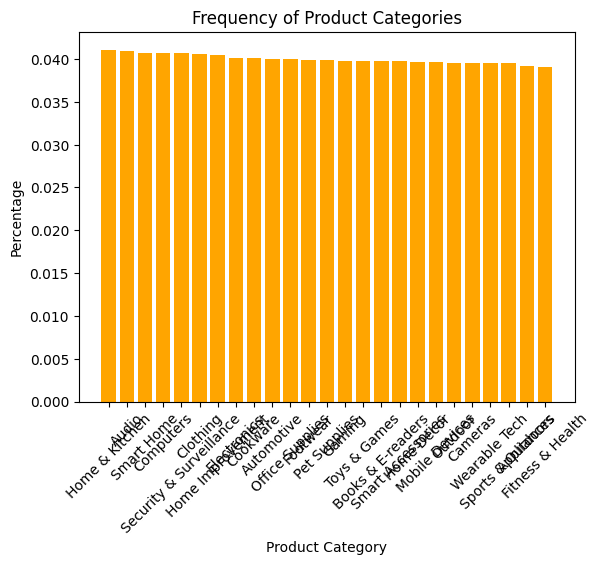

In [66]:
plt.bar(product_category_freq.index, product_category_freq.values, color='orange')
plt.xlabel('Product Category')
plt.ylabel('Percentage')
plt.title('Frequency of Product Categories')
plt.xticks(rotation=45)
plt.show()

The bar plot displays the frequency of product categories in a dataset, with taller bars indicating higher frequency. It allows easy comparison of categories, revealing their distribution across the dataset. Dominant categories with the tallest bars are the most frequent. The x-axis labels are rotated for better readability. This visual representation aids in identifying dominant categories and comparing their frequency across the dataset.
Since all the bars are of similar heights with smaller  veriations in heights , this indicates the occurence of all the categories have a similar frequency

Visualizing using Kernel Density Plot

<ipython-input-67-d5dd742fa879>:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=product_category_freq.values, color='orange', shade=True)


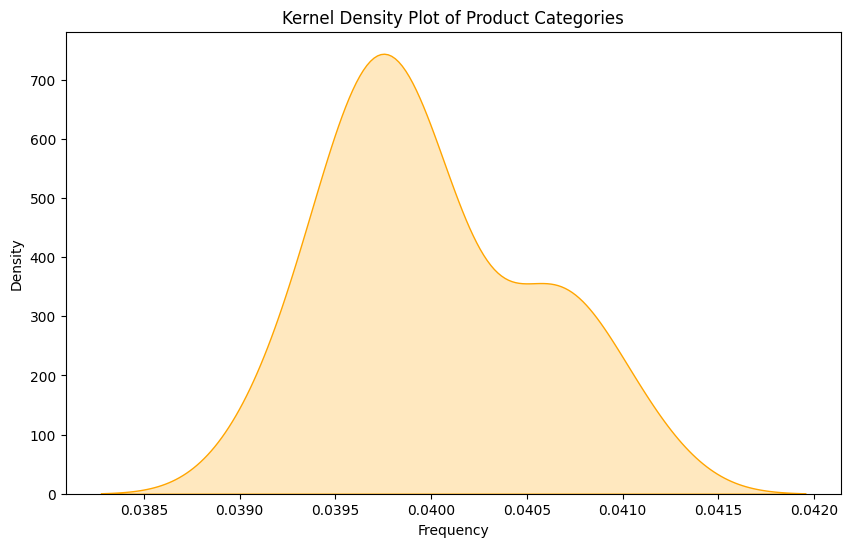

In [67]:
plt.figure(figsize=(10, 6))
sns.kdeplot(data=product_category_freq.values, color='orange', shade=True)
plt.xlabel('Frequency')
plt.ylabel('Density')
plt.title('Kernel Density Plot of Product Categories')
plt.show()

The kernel density plot of product category frequencies provides a smooth estimate of the probability density function, revealing the distribution of frequencies. Peaks indicate densely concentrated regions, while the width of the curve indicates data variability. The symmetry of the distribution can be inferred from the shape, with a centered curve and a skewed one. The height of the curve at any point represents the relative density of frequencies.
Clearly the distribution of the frequencies maybe right skewed and the maximum number of data values are clustered  with a freequency of 0.04

Extracting first 500 rows , for further analysis

In [68]:
df1=df.head(500)

# **Bivariate Analysis:**

* Explore relationships between pairs of numerical variables:

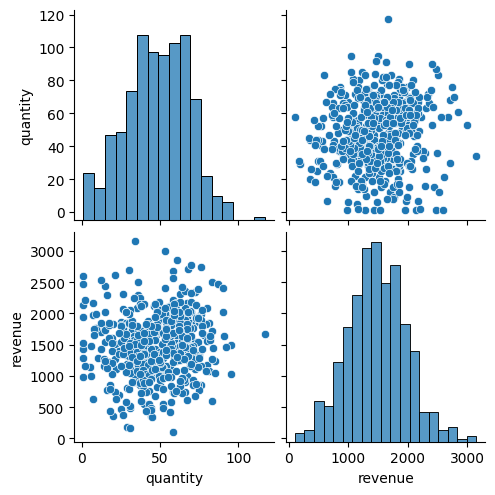

In [69]:
sns.pairplot(df1[['quantity', 'revenue']])
plt.show()

The pair plot of 'quantity' and'revenue' provides a visual representation of their relationship, allowing for insights into their correlation, distribution, and the presence of outliers. Scatter plots represent data points with 'quantity' and'revenue' values on the x-axis, while diagonal plots show the distribution of each variable separately. A clear pattern or trend suggests a correlation between the two variables. A positive correlation indicates an increase in one variable, while a negative correlation indicates a decrease.

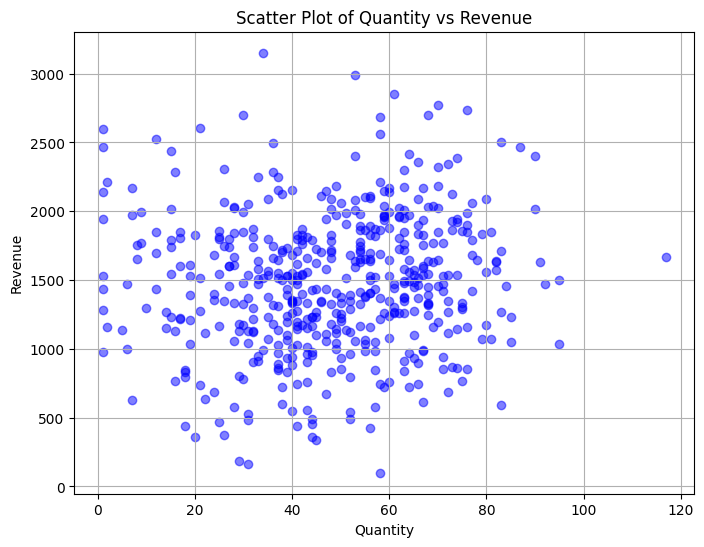

In [70]:
plt.figure(figsize=(8, 6))
plt.scatter(df1['quantity'], df1['revenue'], color='blue', alpha=0.5)
plt.xlabel('Quantity')
plt.ylabel('Revenue')
plt.title('Scatter Plot of Quantity vs Revenue')
plt.grid(True)
plt.show()

We clearly observe  that there is to much scatteredness in the data points , hence we can infere that there maybe no correlation between revenue and quantity

Explore relationships between numerical and categorical variables

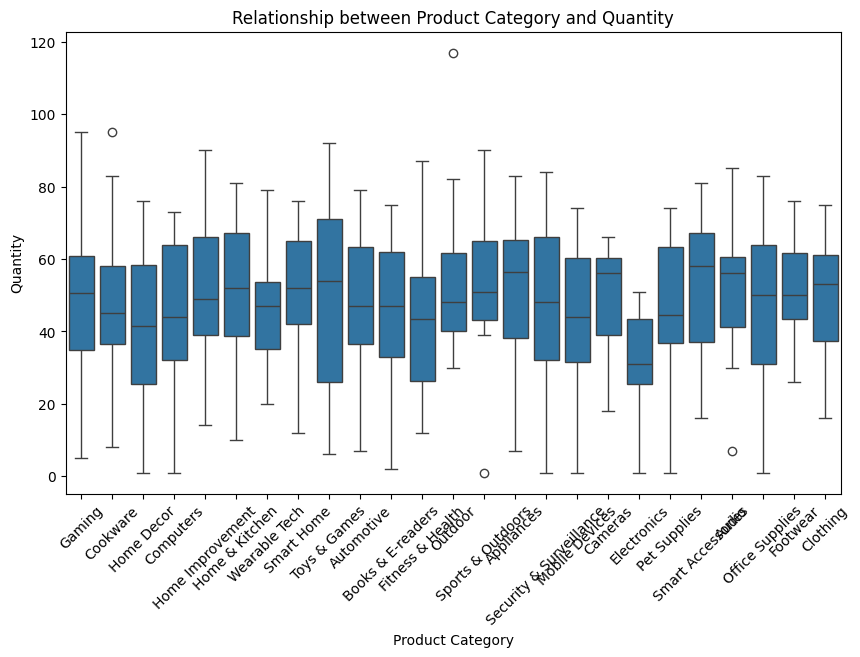

In [71]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='productcategory', y='quantity', data=df1)
plt.xlabel('Product Category')
plt.ylabel('Quantity')
plt.title('Relationship between Product Category and Quantity')
plt.xticks(rotation=45)
plt.show()

The box plot shows the central tendency, spread of data, and outliers within each product category. It shows the median of the data, the spread of the middle 50%, and the presence of extreme values. Comparing the box lengths and positions across different categories helps assess differences in distribution. The plot helps visualize the relationship between product category and quantity, identifying potential differences in central tendency, spread, and outliers.
we also observe that categories like:cookware,Sports & Outdoors ,
Fitness & Health,  
Smart Accessories have outliers

Visualizing  with  violin plot

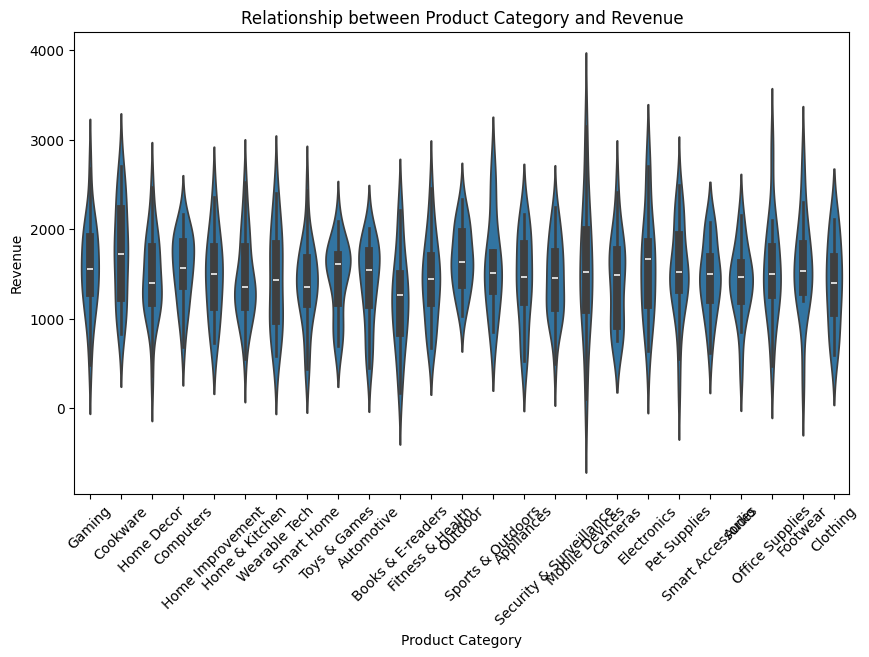

In [72]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='productcategory', y='revenue', data=df1)
plt.xlabel('Product Category')
plt.ylabel('Revenue')
plt.title('Relationship between Product Category and Revenue')
plt.xticks(rotation=45)
plt.show()

The violin plot of revenue grouped by product category shows the probability density of revenue values, central tendency, and data spread. The width of each violin represents the probability density, with wider sections indicating higher density. The median represents the central tendency, and the shape reflects data variability. Comparing the shapes and positions of the violins across different categories allows for assessing differences in revenue distribution. Outliers represent extreme values far from the central tendency.

Calculate correlation coefficients between numerical variables:

In [73]:
correlation_matrix = df[['quantity', 'revenue']].corr()
print(correlation_matrix)

          quantity  revenue
quantity   1.00000  0.00212
revenue    0.00212  1.00000


 we observe that the correlation coefficient = 0.00212, which is approximately equal 0 , therefore we can conclude that there is no relationship between  the quantity and revenue

In [74]:
from scipy.stats import spearmanr, mannwhitneyu

Non- Parametric Methods

In [75]:
# Spearman rank correlation
spearman_corr, _ = spearmanr(df['quantity'], df['revenue'])
print("Spearman rank correlation coefficient:", spearman_corr)


Spearman rank correlation coefficient: 0.0019290484373554314


this the correlation co-effecient =0.0019290484373554314, whic is approximately equal to 0 , we can say there is no correlation between quantity and revenue

We are interested to find If the data is divided into 2  independent sample , does the result show that the sample are taken from the same population distribution, for this we make use of the Mann-Whitney U test

The Mann-Whitney U test, also known as the Mann-Whitney-Wilcoxon test, is a non-
parametric statistical test used to assess whether two independent samples come from the same population or have different population distributions. It is a non-parametric alternative
to the independent samples t-test, which is used for comparing means between two groups.

H0: Have the same  population distribution
vs
H1: does not have same population distribution

In [76]:
# Mann-Whitney U test
from scipy.stats import mannwhitneyu

# Divide the dataset into two independent samples
sample1 = df['revenue'].iloc[:33728]  # First half of the dataset
sample2 = df['revenue'].iloc[33728:]  # Second half of the dataset

# Perform Mann-Whitney U test
mannwhitneyu_test_statistic, mannwhitneyu_p_value = mannwhitneyu(sample1, sample2)
print("Mann-Whitney U test statistic:", mannwhitneyu_test_statistic)
print("Mann-Whitney U test p-value:", mannwhitneyu_p_value)


Mann-Whitney U test statistic: 1118347629.5
Mann-Whitney U test p-value: 0.864478608738779


Clearly we observe that the p-value =0.86 is greater than the level of significance value 0.05 , hence we accept H0 can conclude that the two samples are from the same population distribution.

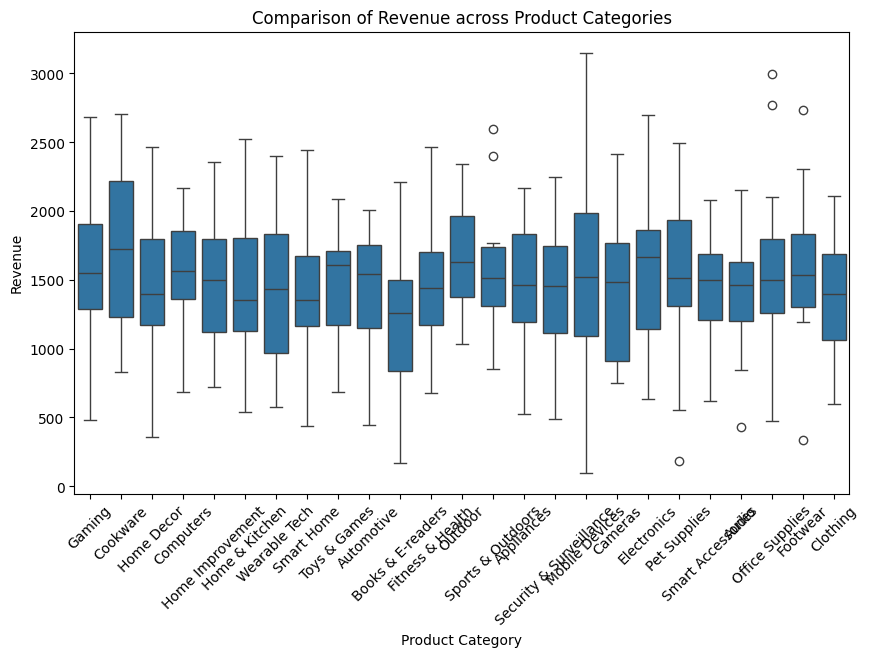

In [77]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='productcategory', y='revenue', data=df1)
plt.xlabel('Product Category')
plt.ylabel('Revenue')
plt.title('Comparison of Revenue across Product Categories')
plt.xticks(rotation=45)
plt.show()

In [78]:
df['productcategory'].unique()

array(['Gaming', 'Cookware', 'Home Decor', 'Computers',
       'Home Improvement', 'Home & Kitchen', 'Wearable Tech',
       'Smart Home', 'Toys & Games', 'Automotive', 'Books & E-readers',
       'Fitness & Health', 'Outdoor', 'Sports & Outdoors', 'Appliances',
       'Security & Surveillance', 'Mobile Devices', 'Cameras',
       'Electronics', 'Pet Supplies', 'Smart Accessories', 'Audio',
       'Office Supplies', 'Footwear', 'Clothing'], dtype=object)

We are interested to find If the data is divided into 2  independent sample , based on two groups of categories and their corresponding revenues, does the result show that the sample are taken from the same population distribution, for this we make use of the Mann-Whitney U test

H0: Have the same  population distribution
vs
H1: does not have same population distribution

In [79]:
from scipy.stats import mannwhitneyu

# Define the major groups
home_lifestyle_categories = ['Gaming', 'Cookware', 'Home Decor', 'Home Improvement', 'Home & Kitchen', 'Smart Home',
                             'Toys & Games', 'Automotive', 'Books & E-readers', 'Fitness & Health', 'Outdoor',
                             'Sports & Outdoors', 'Appliances', 'Security & Surveillance', 'Pet Supplies',
                             'Footwear', 'Clothing']
electronics_gadgets_categories = ['Computers', 'Wearable Tech', 'Mobile Devices', 'Cameras', 'Electronics',
                                  'Smart Accessories', 'Audio', 'Office Supplies']

# Divide the dataset into two independent samples based on major groups
sample1 = df[df['productcategory'].isin(home_lifestyle_categories)]['revenue']
sample2 = df[df['productcategory'].isin(electronics_gadgets_categories)]['revenue']

# Perform Mann-Whitney U test
mannwhitneyu_test_statistic, mannwhitneyu_p_value = mannwhitneyu(sample1, sample2)
print("Mann-Whitney U test statistic:", mannwhitneyu_test_statistic)
print("Mann-Whitney U test p-value:", mannwhitneyu_p_value)


Mann-Whitney U test statistic: 1081900110.0
Mann-Whitney U test p-value: 0.14145914767873433


Clearly we observe that the p-value =0.141 is greater than the level of significance value 0.05 , hence we accept H0 can conclude that the two samples are from the same population distribution.